<a href="https://colab.research.google.com/github/heba956/deep/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [ ]:
cols=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df=pd.read_csv(url,names=cols)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
(df=="?").sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import plotly.express as px
# import streamlit as st
# st.subheader("Interactive scatter plot between age and heart rate")
fig=px.scatter(df,x="age",y="thalach",color="target",hover_data=["age","thalach"])
labels={"age":"Age","thalach":"Maximum Heart Rate"}
# st.plotly_chart(fig)
fig.update_layout(title="Interactive scatter plot between age and heart rate", xaxis_title=labels["age"], yaxis_title=labels["thalach"])
fig.show()

In [ ]:
# inport Streamlit as st
# st.subheader("3D Visual")
fig = px.scatter_3d(df, x='age',y='chol',z='thalach',color='target',hover_data=['age','chol','thalach'])
color='target',
# st.plotly_chart(fig)

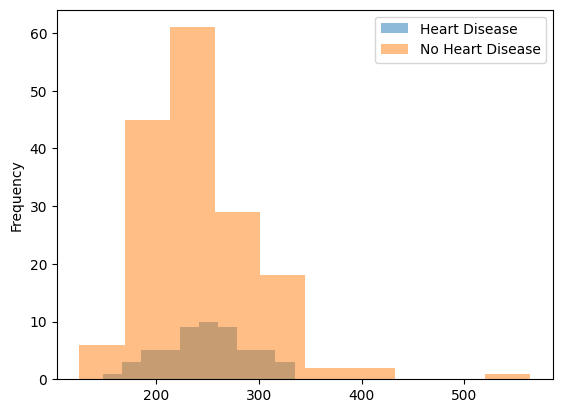

In [ ]:
import matplotlib.pyplot as plt
# import streamlit as st
# st.subheader("cholesterol Distribution by outcome")
fig, ax =plt.subplots()
df[df['target']==1]['chol'].plot(kind='hist',alpha=0.5,ax=ax,label='Heart Disease')
df[df['target']==0]['chol'].plot(kind='hist',alpha=0.5,ax=ax,label='No Heart Disease')
ax.legend()
# st.pyplot(fig)
plt.show()

To run the Streamlit app, execute the following command in a new code cell:

In [ ]:
import numpy as np
df=df.replace("?",np.nan)
df= df.replace(np.nan,0)
df=df.dropna()
print(df.shape)

(303, 14)


In [ ]:
df['target']=df['target'].apply(lambda x:1 if x>0 else 0)
print(df['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x = df.drop("target",axis=1)
y=df["target"]
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train shape:",x_train.shape,y_train.shape)
print("Test shape:",X_test.shape,y_test.shape)
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train shape: (242, 13) (242,)
Test shape: (61, 13) (61,)
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_train,y_train)
y_pred=rf_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

log_metrics={
    "model":["Logistic Regression"],
    "accuracy":[accuracy_score(y_test,y_pred)],
    "precision":precision_score(y_test,y_pred),
    "recall": recall_score(y_test,y_pred),
    "f1":f1_score(y_test,y_pred)
}
rf_metrics={
    "model":"Random Forest",
    "accuracy":accuracy_score(y_test,y_pred),
    "precision":precision_score(y_test,y_pred),
    "recall":recall_score(y_test,y_pred),
    "f1":f1_score(y_test,y_pred)
}

results_df = pd.DataFrame([log_metrics, rf_metrics])
print(results_df)

                   model              accuracy  precision  recall        f1
0  [Logistic Regression]  [0.8852459016393442]   0.903226   0.875  0.888889
1          Random Forest              0.885246   0.903226   0.875  0.888889


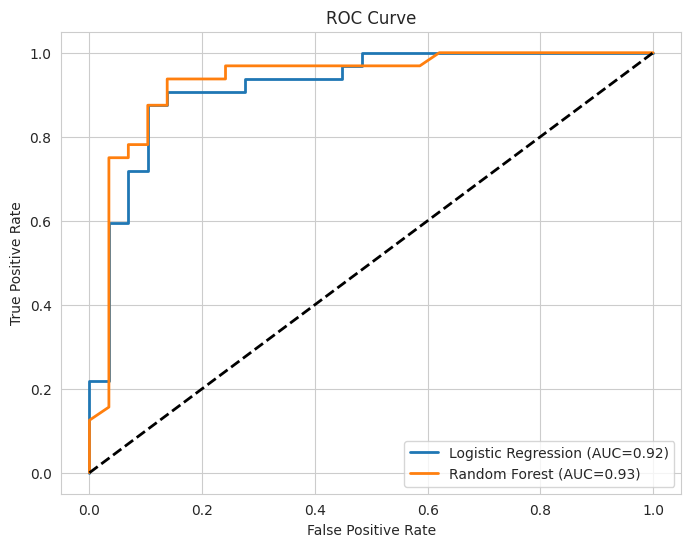

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc
y_proba_log = log_reg.predict_proba(X_test)[:,1]
y_proba_rf = rf_classifier.predict_proba(X_test)[:,1]
fpr_log,tpr_log,thresholds_log=roc_curve(y_test,y_proba_log)
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,y_proba_rf)
auc_log=auc(fpr_log,tpr_log)
auc_rf=auc(fpr_rf,tpr_rf)
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.plot(fpr_log,tpr_log,label=f"Logistic Regression (AUC={auc_log:.2f})",lw=2)
plt.plot(fpr_rf,tpr_rf,label=f"Random Forest (AUC={auc_rf:.2f})",lw=2)
plt.plot([0,1],[0,1],"k--",lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib
joblib.dump(rf_classifier,"heart_disease_model.pkl")
print("Model saved as heart_disease_model.pkl")

Model saved as heart_disease_model.pkl


In [ ]:
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("heart_disease_model.pkl")

st.title("Heart Disease Prediction app")
st.write("Enter patient details to  predict heart disease")

age=st.number_input("Age",min_value=0,max_value=120,value=30)
sex=st.radio("Sex",["Male","Female"])
cp=st.selectbox("Chest Pain Type",["Typical Angina","Atypical Angina","Non-anginal Pain","Asymptomatic"])
trestbps=st.number_input("Resting Blood Pressure",min_value=0,max_value=200,value=120)
chol=st.number_input("Serum Cholesterol",min_value=0,max_value=600,value=200)
fbs=st.radio("Fasting Blood Sugar",["True","False"])
restecg =st.selectbox("resting ECG Results",[0,1,2])
thalach = st.number_input("Max heart rate ",min_value=60,max_value=220,value=150)
exang=st.radio("Exercise induced angina",["True","False"])
oldpeak=st.number_input("ST depression induced by exercise",min_value=0.0,max_value=10.0,value=0.1)
slope = st.selectbox("Slope of the peak exercise ST segment",[0,1,2])
ca = st.selectbox("Number of major vessels",[0,1,2,3])
thal = st.selectbox("Thal",[3,6,7])

# Convert input data to DataFrame
input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]],
                          columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])

# Convert categorical features to numerical for prediction
input_data['sex'] = input_data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
cp_mapping = {"Typical Angina": 1, "Atypical Angina": 2, "Non-anginal Pain": 3, "Asymptomatic": 4}
input_data['cp'] = input_data['cp'].map(cp_mapping)
input_data['fbs'] = input_data['fbs'].apply(lambda x: 1 if x == 'True' else 0)
input_data['exang'] = input_data['exang'].apply(lambda x: 1 if x == 'True' else 0)

if st.button("predict"):
  prediction = model.predict(input_data)[0]
  probability = model.predict_proba(input_data)[0][1]

  if prediction == 1:
    st.error(f"High Risk of Heart Disease. Probability:{probability:.2f}")
  else:
    st.success(f"Low Risk of Heart Disease. Probability:{probability:.2f}")

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://late-laws-stand.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:17295 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("heart_disease_model.pkl")

st.title("Heart Disease Prediction app")
st.write("Enter patient details to  predict heart disease")

age=st.number_input("Age",min_value=0,max_value=120,value=30)
sex=st.radio("Sex",["Male","Female"])
cp=st.selectbox("Chest Pain Type",["Typical Angina","Atypical Angina","Non-anginal Pain","Asymptomatic"])
trestbps=st.number_input("Resting Blood Pressure",min_value=0,max_value=200,value=120)
chol=st.number_input("Serum Cholesterol",min_value=0,max_value=600,value=200)
fbs=st.radio("Fasting Blood Sugar",["True","False"])
restecg =st.selectbox("resting ECG Results",[0,1,2])
thalach = st.number_input("Max heart rate ",min_value=60,max_value=220,value=150)
exang=st.radio("Exercise induced angina",["True","False"])
oldpeak=st.number_input("ST depression induced by exercise",min_value=0.0,max_value=10.0,value=0.1)
slope = st.selectbox("Slope of the peak exercise ST segment",[0,1,2])
ca = st.selectbox("Number of major vessels",[0,1,2,3])
thal = st.selectbox("Thal",[3,6,7])

# Convert input data to DataFrame
input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]],
                          columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])

# Convert categorical features to numerical for prediction
input_data['sex'] = input_data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
cp_mapping = {"Typical Angina": 1, "Atypical Angina": 2, "Non-anginal Pain": 3, "Asymptomatic": 4}
input_data['cp'] = input_data['cp'].map(cp_mapping)
input_data['fbs'] = input_data['fbs'].apply(lambda x: 1 if x == 'True' else 0)
input_data['exang'] = input_data['exang'].apply(lambda x: 1 if x == 'True' else 0)

if st.button("predict"):
  prediction = model.predict(input_data)[0]
  probability = model.predict_proba(input_data)[0][1]

  if prediction == 1:
    st.error(f"High Risk of Heart Disease. Probability:{probability:.2f}")
  else:
    st.success(f"Low Risk of Heart Disease. Probability:{probability:.2f}")